In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.20.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for easy reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


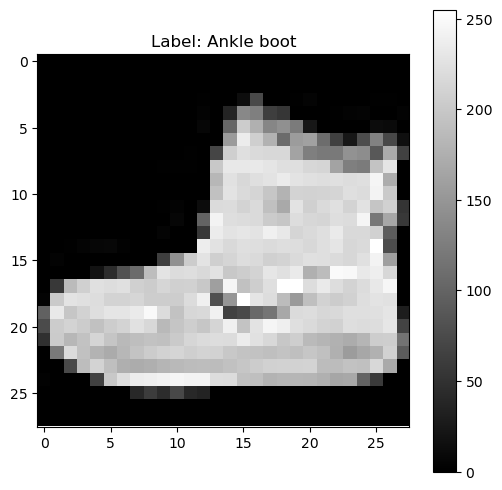

In [3]:
plt.figure(figsize=(6,6))
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.title(f"Label: {class_names[train_labels[0]]}")
plt.show()


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [5]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),     # Convert 28x28 image to 784 vector
    layers.Dense(128, activation='relu'),     # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')    # Output layer with 10 classes
])


C:\Users\Mutari\miniconda3\envs\tf\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
print("Model successfully built and ready for training!")


Model successfully built and ready for training!


In [8]:
from tensorflow.keras.datasets import mnist

# Load dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Data normalized successfully!")


Data normalized successfully!


In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    x_train, y_train, 
    epochs=5,           # how many times the model sees the whole dataset
    validation_data=(x_test, y_test)  # to check accuracy on unseen data
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9245 - loss: 0.2618 - val_accuracy: 0.9576 - val_loss: 0.1399
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9656 - loss: 0.1151 - val_accuracy: 0.9690 - val_loss: 0.1013
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9756 - loss: 0.0790 - val_accuracy: 0.9728 - val_loss: 0.0895
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9815 - loss: 0.0597 - val_accuracy: 0.9745 - val_loss: 0.0808
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9859 - loss: 0.0472 - val_accuracy: 0.9735 - val_loss: 0.0849


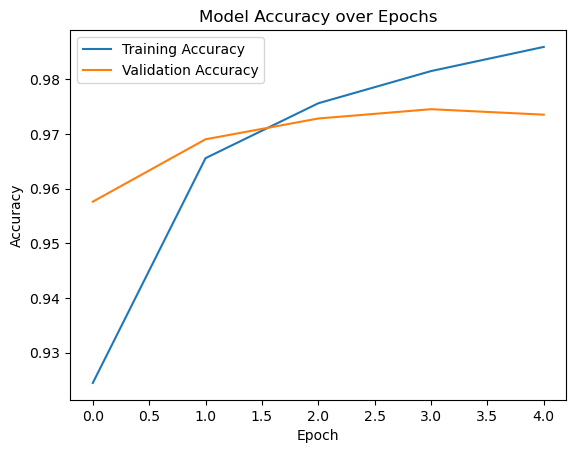

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy over Epochs')
plt.show()


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test accuracy: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9735 - loss: 0.0849

✅ Test accuracy: 0.9735


In [14]:
# Use the trained model to make predictions on the test set
predictions = model.predict(x_test)

# Display the shape of the predictions
print("Prediction shape:", predictions.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction shape: (10000, 10)


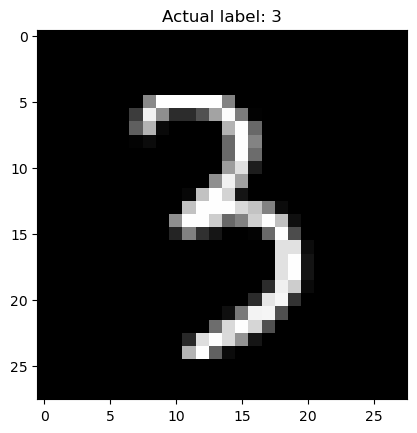

Predicted label: 3


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random image from the test set
index = np.random.randint(0, len(x_test))

plt.imshow(x_test[index], cmap='gray')
plt.title(f"Actual label: {y_test[index]}")
plt.show()

# Model’s predicted label
predicted_label = np.argmax(predictions[index])
print(f"Predicted label: {predicted_label}")


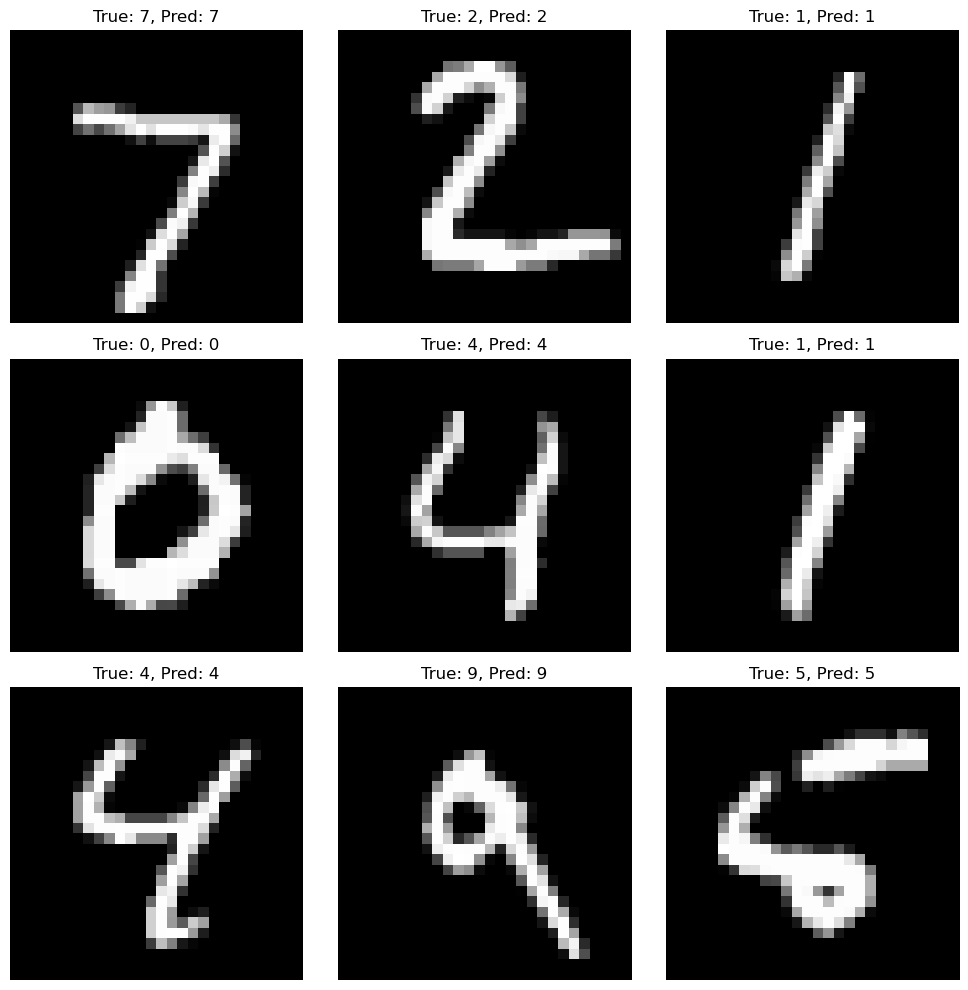

In [16]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [17]:
# Save the entire model to a file
model.save("mnist_model.h5")

print("✅ Model saved successfully as mnist_model.h5")


✅ Model saved successfully as mnist_model.h5
